In [1]:
import numpy as np
import matplotlib.pyplot as plt


def a(x):
    if task == 1:
        return 1
    elif task == 2:
        return np.sin(var)
    elif task == 3:
        return np.sin(var*x)


def b(x):
    if task == 1:
        return 1
    elif task == 2:
        return np.cos(var)
    elif task == 3:
        return np.cos(var*x)


def q(x):
    return 1+b(x)*x**2


def fi(x, i):
    if i == 0:
        return 0
    return (1-x**2)*x**(i-1)


def diff2fi(x, i):
    if i == 0:
        return 0
    elif i == 1:
        return -2
    elif i == 2:
        return -6*x
    else:
        return (i-1)*(i-2)*x**(i-3)-i*(i+1)*x**(i-1)

    
def y(x, a_list):
    sum = 0
    for a, i in zip(a_list, range(1, len(a_list)+1)):
        sum += a * fi(x, i)
    return sum


A = -1
B = 1
task = 1
var = 4

In [2]:
def c1(x):
    return -1 - a(x) * diff2fi(x, 0) - q(x) * fi(x, 0)


def k1(x, i):
    return a(x) * diff2fi(x, i) + q(x) * fi(x, i)

## Метод коллокаций


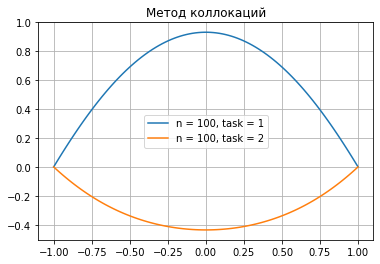

In [31]:
n = 100
for task in [1, 2]:
    x_list = np.linspace(A, B, n + 2)
    x_list = list(x_list)

    matrix = []
    vector = []

    for x in x_list[1:-1:]:
        row = []
        if n % 2 == 1:
            for i in range(1, n):
                row.append(k1(x, i))
        else:
            for i in range(1, n+1):
                row.append(k1(x, i))
        matrix.append(row)
        vector.append(c1(x))

    matrix = np.matrix(matrix, dtype='float')
    vector = np.array(vector, dtype='float')

    if m % 2 == 1:
        a_list = np.linalg.solve(matrix[:-1:], vector[:-1:])
    else:
        a_list = np.linalg.solve(matrix, vector)

    result1 = []
    for x in x_list[1:-1:]:
        result1.append(y(x, a_list))
    result1.insert(0, 0)
    result1.append(0)
    
    plt.plot(x_list, result1, label = "n = %d, task = %d" % (n, task))
plt.title("Метод коллокаций")
plt.legend()
plt.grid()

In [4]:
def c2(x_list, j):
    sum = 0
    for x in x_list:
        sum += (a(x) * diff2fi(x, j) + q(x) * fi(x, j)) * (a(x) * diff2fi(x, 0) + q(x) * fi(x, 0) + 1)
    return -2*sum


def k2(x_list, i, j):
    sum = 0
    for x in x_list:
        sum += (a(x) * diff2fi(x, j) + q(x) * fi(x, j)) * (a(x) * diff2fi(x, i) + q(x) * fi(x, i))
    return 2*sum

## Метод наименьших квадратов

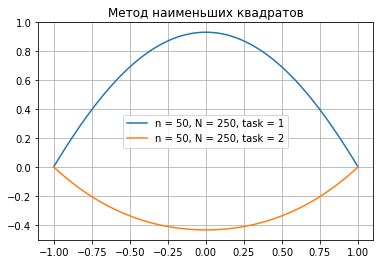

In [33]:
n = 50
N = 5*n
for task in [1, 2]:
    x_list_2 = np.linspace(A, B, N + 2)[1:-1:]

    matrix = []
    vector = []

    for j in range(1, n + 1):
        row = []
        for i in range(1, n + 1):
            row.append(k2(x_list_2, i, j))
        vector.append(c2(x_list_2, j))
        matrix.append(row)

    matrix = np.matrix(matrix, dtype='float')
    vector = np.array(vector, dtype='float')

    a_list = np.linalg.solve(matrix, vector)

    result2 = []
    for x in x_list[1:-1:]:
        result2.append(y(x, a_list))

    result2.insert(0, 0)
    result2.append(0)

    plt.plot(x_list, result2, label = "n = %d, N = %d, task = %d" % (n, N, task))
plt.title("Метод наименьших квадратов")
plt.legend()
plt.grid()

In [6]:
def integ(func, i, j, a, b, h):
    points = np.arange(a, b, h)
    points = list(points)
    points.append(b)
    result = 0
    for k in range(len(points)-1):
        result += (func(points[k], i, j)+func(points[k+1], i, j))*(points[k+1]-points[k])/2
    return result


def a_fi_diff2fi(x, i, j):
    return a(x) * fi(x, j) * diff2fi(x, i)


def q_fi_fi(x, i, j):
    return q(x) * fi(x, i) * fi(x, j)


def fi_(x, _, j):
    if j == 0:
        return 0
    return (1-x**2)*x**(j-1)

## Метод Галёркина

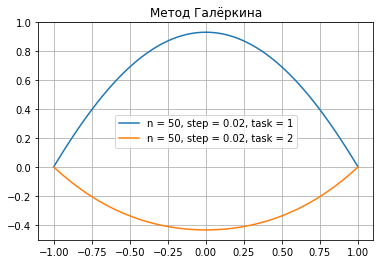

In [36]:
n = 50
step = 0.02
for task in [1, 2]:
    matrix = []
    vector = []

    for j in range(1, n + 1):
        row = []
        for i in range(1, n + 1):
            row.append(integ(a_fi_diff2fi, i, j, A, B, step) + integ(q_fi_fi, i, j, A, B, step))
        vector.append(-(integ(a_fi_diff2fi, 0, j, A, B, step) + integ(q_fi_fi, 0, j, A, B, step) + integ(fi_, 0, j, A, B, step)))
        matrix.append(row)

    matrix = np.matrix(matrix, dtype='float')
    vector = np.array(vector, dtype='float')

    a_list = np.linalg.solve(matrix, vector)

    result3 = []
    for x in x_list[1:-1:]:
        result3.append(y(x, a_list))

    result3.insert(0, 0)
    result3.append(0)

    plt.plot(x_list, result3, label = "n = %d, step = %.2f, task = %d" % (n, step, task))
plt.title("Метод Галёркина")
plt.legend()
plt.grid()